[link](https://chat.openai.com/c/bc220dcb-d654-4d58-91e8-9a1906007573)

## Smoke drink predictor

### IMPORTING PACKAGES 📦📦

In [68]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### DATA OVERVIEWS 🧐📊

In [69]:
data = pd.read_csv('../data/smoking_driking.csv')

In [70]:
data.head(2)

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N


In [71]:
data.shape

(991346, 24)

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991346 entries, 0 to 991345
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sex               991346 non-null  object 
 1   age               991346 non-null  int64  
 2   height            991346 non-null  int64  
 3   weight            991346 non-null  int64  
 4   waistline         991346 non-null  float64
 5   sight_left        991346 non-null  float64
 6   sight_right       991346 non-null  float64
 7   hear_left         991346 non-null  float64
 8   hear_right        991346 non-null  float64
 9   SBP               991346 non-null  float64
 10  DBP               991346 non-null  float64
 11  BLDS              991346 non-null  float64
 12  tot_chole         991346 non-null  float64
 13  HDL_chole         991346 non-null  float64
 14  LDL_chole         991346 non-null  float64
 15  triglyceride      991346 non-null  float64
 16  hemoglobin        99

In [73]:
data.describe()

,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,...,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd
count,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,...,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000
mean,47.614491,162.240625,63.284050,81.233358,0.980834,0.978429,1.031495,1.030476,122.432498,76.052627,...,56.936800,113.037692,132.141751,14.229824,1.094224,0.860467,25.989308,25.755051,37.136347,1.608122
std,14.181339,9.282957,12.514241,11.850323,0.605949,0.604774,0.174650,0.171892,14.543148,9.889365,...,17.238479,35.842812,102.196985,1.584929,0.437724,0.480530,23.493386,26.308599,50.424153,0.818507
min,20.000000,130.000000,25.000000,8.000000,0.100000,0.100000,1.000000,1.000000,67.000000,32.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.100000,1.000000,1.000000,1.000000,1.000000
25%,35.000000,155.000000,55.000000,74.100000,0.700000,0.700000,1.000000,1.000000,112.000000,70.000000,...,46.000000,89.000000,73.000000,13.200000,1.000000,0.700000,19.000000,15.000000,16.000000,1.000000
50%,45.000000,160.000000,60.000000,81.000000,1.000000,1.000000,1.000000,1.000000,120.000000,76.000000,...,55.000000,111.000000,106.000000,14.300000,1.000000,0.800000,23.000000,20.000000,23.000000,1.000000
75%,60.000000,170.000000,70.000000,87.800000,1.200000,1.200000,1.000000,1.000000,131.000000,82.000000,...,66.000000,135.000000,159.000000,15.400000,1.000000,1.000000,28.000000,29.000000,39.000000,2.000000
max,85.000000,190.000000,140.000000,999.000000,9.900000,9.900000,2.000000,2.000000,273.000000,185.000000,...,8110.000000,5119.000000,9490.000000,25.000000,6.000000,98.000000,9999.000000,7210.000000,999.000000,3.000000


In [74]:
columns = data.columns
columns

Index(['sex', 'age', 'height', 'weight', 'waistline', 'sight_left',
       'sight_right', 'hear_left', 'hear_right', 'SBP', 'DBP', 'BLDS',
       'tot_chole', 'HDL_chole', 'LDL_chole', 'triglyceride', 'hemoglobin',
       'urine_protein', 'serum_creatinine', 'SGOT_AST', 'SGOT_ALT',
       'gamma_GTP', 'SMK_stat_type_cd', 'DRK_YN'],
      dtype='object')

In [75]:
data.describe(include=['O'])

,sex,DRK_YN
count,991346,991346
unique,2,2
top,Male,N
freq,526415,495858


In [76]:
columns_with_missing_values = data.columns[data.isnull().sum() > 0]
print(columns_with_missing_values)

Index([], dtype='object')


In [77]:
sex_mapping = {'Male': 1, 'Female': 0} 
data['sex'] = data['sex'].map(sex_mapping)

drk_mapping = {'Y': 1, 'N': 0} 
data['DRK_YN'] = data['DRK_YN'].map(drk_mapping)

In [78]:

data.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,1,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,1
1,1,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,0
2,1,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,0
3,1,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,0
4,1,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,0


In [79]:
is_smoking= data['SMK_stat_type_cd']
print(is_smoking.head())

is_drinking = data['DRK_YN']
print(is_drinking.head())

0    1.0
1    3.0
2    1.0
3    1.0
4    1.0
Name: SMK_stat_type_cd, dtype: float64
0    1
1    0
2    0
3    0
4    0
Name: DRK_YN, dtype: int64


### Boxplot and removing outlier

In [81]:
data.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,1,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,1
1,1,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,0
2,1,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,0
3,1,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,0
4,1,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,0


In [82]:
is_smoking.head()

0    1.0
1    3.0
2    1.0
3    1.0
4    1.0
Name: SMK_stat_type_cd, dtype: float64

In [83]:
is_drinking.head()

0    1
1    0
2    0
3    0
4    0
Name: DRK_YN, dtype: int64

In [84]:
data.shape

(991346, 24)

#### ANALYZING, Systolic blood pressure[mmHg] (SBP)

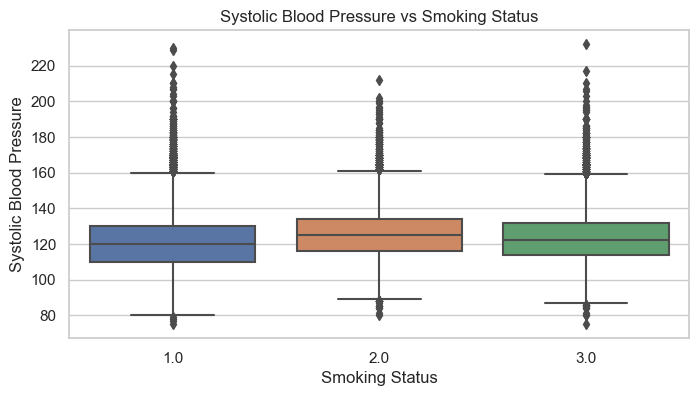

In [85]:
sbp_data = data['SBP'].head(100000)

sns.set(style="whitegrid")
plt.figure(figsize=(8, 4))

sns.boxplot(x=is_smoking, y=sbp_data,)

plt.xlabel('Smoking Status')
plt.ylabel('Systolic Blood Pressure')
plt.title('Systolic Blood Pressure vs Smoking Status')

plt.show()

In [86]:
outlier_threshold_SBP = 220

dbp_data = data['SBP']

count_greater_than = (dbp_data > outlier_threshold_SBP).sum()

print(
    f'Number of values greater than {outlier_threshold_SBP} in DBP: {count_greater_than}')

Number of values greater than 220 in DBP: 33


In [87]:
mask = data['SBP'] > outlier_threshold_SBP

data = data[~mask]

removed_rows = mask.sum()
print(f'Number of rows removed: {removed_rows}')

Number of rows removed: 33


In [88]:
data.shape

(991313, 24)

#### ANALYZING Diastolic blood pressure[mmHg] (DBP)

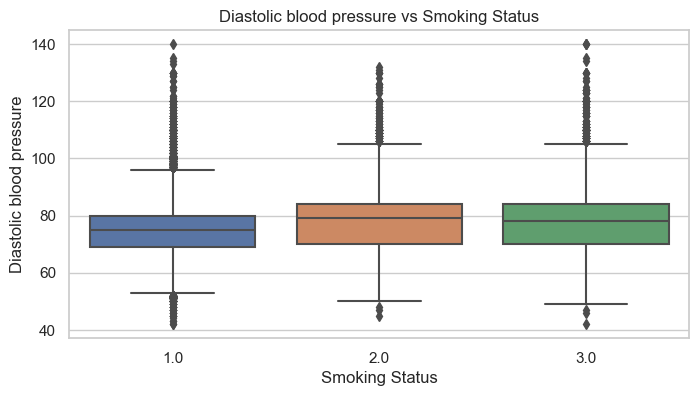

In [89]:
dbp_data = data['DBP'].head(100000)

sns.set(style="whitegrid")
plt.figure(figsize=(8, 4))

sns.boxplot(x=is_smoking, y=dbp_data,)

plt.xlabel('Smoking Status')
plt.ylabel('Diastolic blood pressure')
plt.title('Diastolic blood pressure vs Smoking Status')

plt.show()

In [90]:
outlier_threshold_dbp = 140

dbp_data = data['DBP']

count_greater_than = (dbp_data > outlier_threshold_dbp).sum()

print(
    f'Number of values greater than {outlier_threshold_dbp} in DBP: {count_greater_than}')

Number of values greater than 140 in DBP: 29


In [91]:
mask = data['DBP'] > outlier_threshold_dbp

data = data[~mask]

removed_rows = mask.sum()
print(f'Number of rows removed: {removed_rows}')

Number of rows removed: 29


In [92]:
data.shape

(991284, 24)

#### ANALYZING BLDS or FSG(fasting blood glucose)[mg/dL]

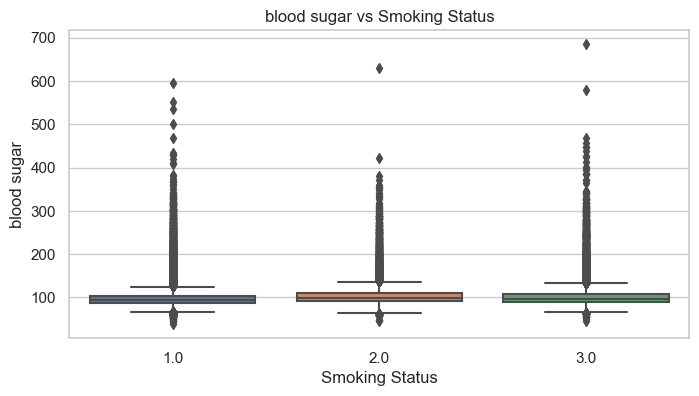

In [93]:
blds_data = data['BLDS'].head(100000)


sns.set(style="whitegrid")
plt.figure(figsize=(8, 4))

sns.boxplot(x=is_smoking, y=blds_data,)

plt.xlabel('Smoking Status')
plt.ylabel('blood sugar')
plt.title('blood sugar vs Smoking Status')

plt.show()

In [94]:
outlier_threshold_BLDS = 500

dbp_data = data['BLDS']

count_greater_than = (dbp_data > outlier_threshold_BLDS).sum()

print(
    f'Number of values greater than {outlier_threshold_BLDS} in DBP: {count_greater_than}')

Number of values greater than 500 in DBP: 52


In [95]:
mask = data['BLDS'] > outlier_threshold_BLDS

data = data[~mask]

removed_rows = mask.sum()
print(f'Number of rows removed: {removed_rows}')

Number of rows removed: 52


In [96]:
data.shape

(991232, 24)

#### ANALYZING tot_chole   total cholesterol[mg/dL]

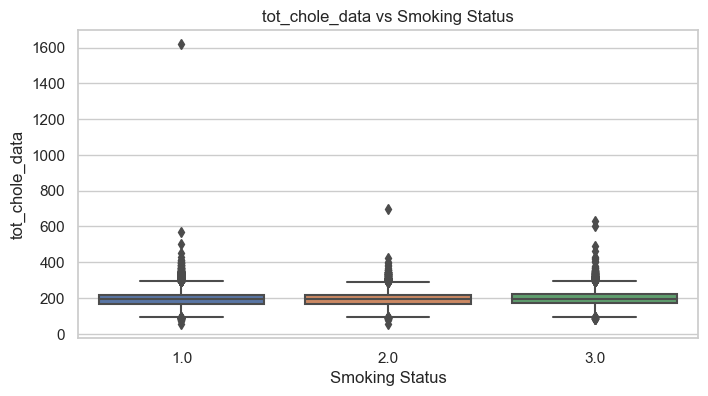

In [97]:
tot_chole_data = data['tot_chole'].head(100000)


sns.set(style="whitegrid")
plt.figure(figsize=(8, 4))

sns.boxplot(x=is_smoking, y=tot_chole_data,)

plt.xlabel('Smoking Status')
plt.ylabel('tot_chole_data')
plt.title('tot_chole_data vs Smoking Status')

plt.show()

In [98]:
outlier_threshold_tot_chole = 800

dbp_data = data['tot_chole']

count_greater_than = (dbp_data > outlier_threshold_tot_chole).sum()

print(
    f'Number of values greater than {outlier_threshold_tot_chole} in DBP: {count_greater_than}')

Number of values greater than 800 in DBP: 19


In [99]:
mask = data['tot_chole'] > outlier_threshold_tot_chole

data = data[~mask]

removed_rows = mask.sum()
print(f'Number of rows removed: {removed_rows}')

Number of rows removed: 19


In [100]:
data.shape

(991213, 24)

#### ANALYZING HDL_chole	HDL cholesterol[mg/dL]	HDL 

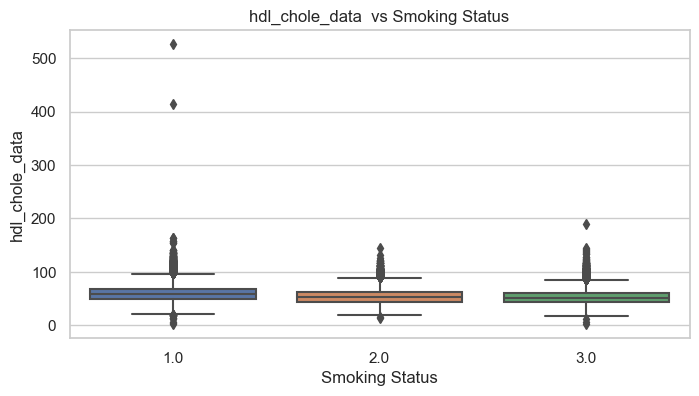

In [101]:
hdl_chole_data = data['HDL_chole'].head(100000)


sns.set(style="whitegrid")
plt.figure(figsize=(8, 4))

sns.boxplot(x=is_smoking, y=hdl_chole_data,)

plt.xlabel('Smoking Status')
plt.ylabel('hdl_chole_data')
plt.title('hdl_chole_data  vs Smoking Status')

plt.show()

In [102]:
outlier_threshold_HDL_chole = 500

dbp_data = data['HDL_chole']

count_greater_than = (dbp_data > outlier_threshold_HDL_chole).sum()

print(
    f'Number of values greater than {outlier_threshold_HDL_chole} in DBP: {count_greater_than}')

Number of values greater than 500 in DBP: 21


In [103]:
mask = data['HDL_chole'] > outlier_threshold_HDL_chole

data = data[~mask]

removed_rows = mask.sum()
print(f'Number of rows removed: {removed_rows}')

Number of rows removed: 21


In [104]:
data.shape

(991192, 24)

#### ANALYZING LDL_chole	LDL cholesterol[mg/dL]	LDL 

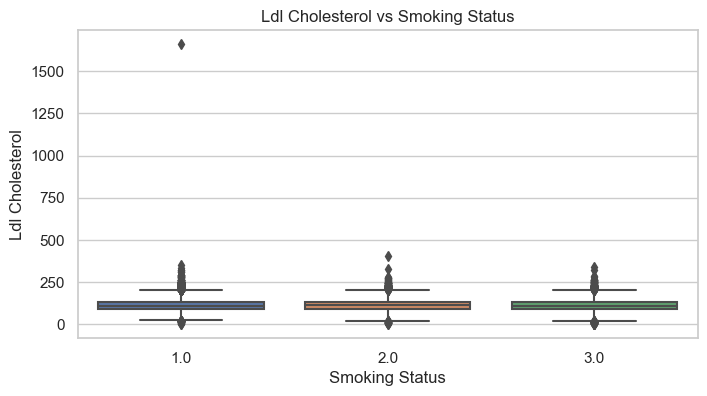

In [105]:
ldl_chole_data = data['LDL_chole'].head(100000)


sns.set(style="whitegrid")
plt.figure(figsize=(8, 4))

sns.boxplot(x=is_smoking, y=ldl_chole_data,)

plt.xlabel('Smoking Status')
plt.ylabel('Ldl Cholesterol')
plt.title('Ldl Cholesterol vs Smoking Status')

plt.show()

In [106]:
outlier_threshold_LDL_chole = 500

dbp_data = data['LDL_chole']

count_greater_than = (dbp_data > outlier_threshold_LDL_chole).sum()

print(
    f'Number of values greater than {outlier_threshold_LDL_chole} in DBP: {count_greater_than}')

Number of values greater than 500 in DBP: 34


In [107]:
mask = data['LDL_chole'] > outlier_threshold_LDL_chole

data = data[~mask]

removed_rows = mask.sum()
print(f'Number of rows removed: {removed_rows}')

Number of rows removed: 34


In [108]:
data.shape

(991158, 24)

#### ANALYZING triglyceride	triglyceride[mg/dL]

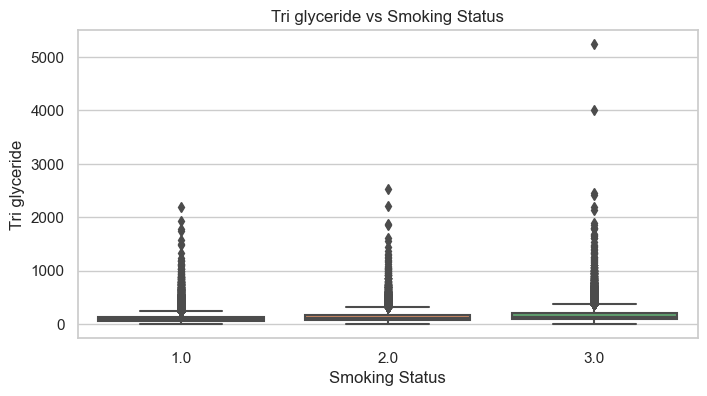

In [109]:
triglyceride_data = data['triglyceride'].head(100000)


sns.set(style="whitegrid")
plt.figure(figsize=(8, 4))

sns.boxplot(x=is_smoking, y=triglyceride_data,)

plt.xlabel('Smoking Status')
plt.ylabel('Tri glyceride')
plt.title('Tri glyceride vs Smoking Status')

plt.show()

In [110]:
outlier_threshold_triglyceride = 2500

dbp_data = data['triglyceride']

count_greater_than = (dbp_data > outlier_threshold_triglyceride).sum()

print(
    f'Number of values greater than {outlier_threshold_triglyceride} in DBP: {count_greater_than}')

Number of values greater than 2500 in DBP: 39


In [111]:
mask = data['triglyceride'] > outlier_threshold_triglyceride

data = data[~mask]

removed_rows = mask.sum()

print(f'Number of rows removed: {removed_rows}')

Number of rows removed: 39


In [112]:
data.shape

(991119, 24)

#### ANALYZING hemoglobin	hemoglobin[g/dL]

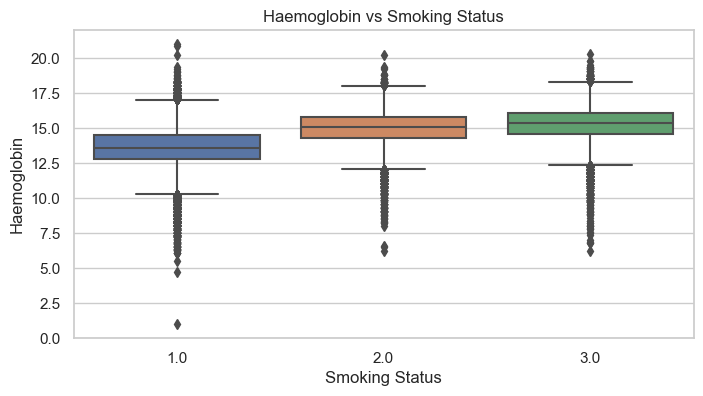

In [113]:
hemoglobin_data = data['hemoglobin'].head(100000)


sns.set(style="whitegrid")
plt.figure(figsize=(8, 4))

sns.boxplot(x=is_smoking, y=hemoglobin_data,)

plt.xlabel('Smoking Status')
plt.ylabel('Haemoglobin')
plt.title('Haemoglobin vs Smoking Status')

plt.show()

In [114]:
outlier_threshold_hemoglobin = 22

dbp_data = data['hemoglobin']

count_greater_than = (dbp_data > outlier_threshold_hemoglobin).sum()

print(
    f'Number of values greater than {outlier_threshold_hemoglobin} in DBP: {count_greater_than}')

Number of values greater than 22 in DBP: 8


In [115]:
mask = data['hemoglobin'] > outlier_threshold_hemoglobin

data = data[~mask]

removed_rows = mask.sum()
print(f'Number of rows removed: {removed_rows}')

Number of rows removed: 8


In [116]:
data.shape

(991111, 24)

#### ANALYZING urine_protein	protein in urine, 1(-), 2(+/-), 3(+1), 4(+2), 5(+3), 6(+4)

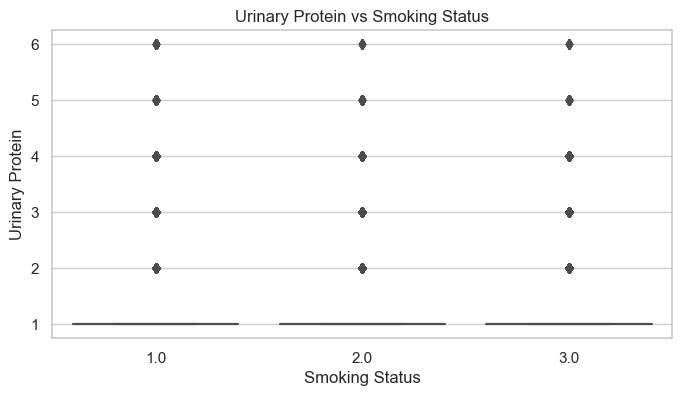

In [117]:
urine_protein_data = data['urine_protein'].head(100000)


sns.set(style="whitegrid")
plt.figure(figsize=(8, 4))

sns.boxplot(x=is_smoking, y=urine_protein_data,)

plt.xlabel('Smoking Status')
plt.ylabel('Urinary Protein')
plt.title('Urinary Protein vs Smoking Status')

plt.show()

In [118]:
outlier_threshold_urine_protein = 6

dbp_data = data['urine_protein']

count_greater_than = (dbp_data > outlier_threshold_urine_protein).sum()

print(
    f'Number of values greater than {outlier_threshold_urine_protein} in DBP: {count_greater_than}')

Number of values greater than 6 in DBP: 0


In [119]:
mask = data['urine_protein'] > outlier_threshold_urine_protein

data = data[~mask]

removed_rows = mask.sum()
print(f'Number of rows removed: {removed_rows}')

Number of rows removed: 0


In [120]:
data.shape

(991111, 24)

#### ANALYZING serum_creatinine	serum(blood) creatinine[mg/dL]	

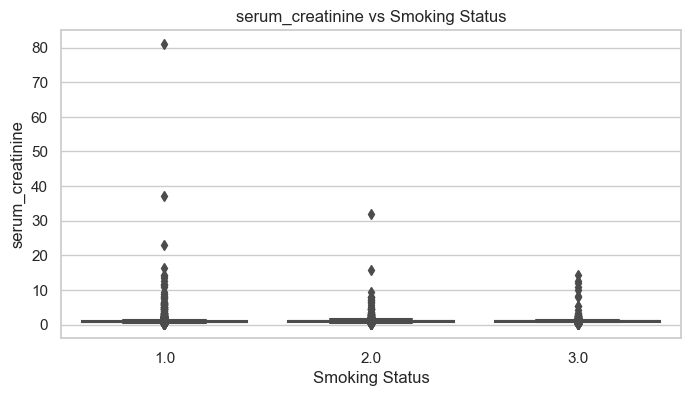

In [121]:
serum_creatinine_data = data['serum_creatinine'].head(100000)

sns.set(style="whitegrid")
plt.figure(figsize=(8, 4))

sns.boxplot(x=is_smoking, y=serum_creatinine_data,)

plt.xlabel('Smoking Status')
plt.ylabel('serum_creatinine')
plt.title('serum_creatinine vs Smoking Status')

plt.show()

In [122]:
outlier_threshold_serum_creatinine = 30

dbp_data = data['serum_creatinine']

count_greater_than = (dbp_data > outlier_threshold_serum_creatinine).sum()

print(
    f'Number of values greater than {outlier_threshold_serum_creatinine} in DBP: {count_greater_than}')

Number of values greater than 30 in DBP: 25


In [123]:
mask = data['serum_creatinine'] > outlier_threshold_serum_creatinine

data = data[~mask]

removed_rows = mask.sum()
print(f'Number of rows removed: {removed_rows}')

Number of rows removed: 25


In [124]:
data.shape

(991086, 24)

### countplot for all columns

In [142]:
for idx, column in enumerate(['SBP', 'DBP', 'BLDS', 'tot_chole', 'HDL_chole', 'LDL_chole', 'triglyceride', 'hemoglobin', 'urine_protein', 'serum_creatinine'], start=1):
    for smoking_status in [1, 2, 3]:
        subset_data = data[column][is_smoking == smoking_status]
        print(f"Column: {column}, Subset {smoking_status} - Mean: {subset_data.mean():.4f}, Std Dev: {subset_data.std():.4f}, Median: {subset_data.median():.4f}")

    print(idx, " ###########################################################################")

Column: SBP, Subset 1 - Mean: 121.1726, Std Dev: 14.8748, Median: 120.0000
Column: SBP, Subset 2 - Mean: 125.3364, Std Dev: 13.7574, Median: 125.0000
Column: SBP, Subset 3 - Mean: 123.5746, Std Dev: 13.6684, Median: 122.0000
1  ###########################################################################
Column: DBP, Subset 1 - Mean: 74.9127, Std Dev: 9.7896, Median: 75.0000
Column: DBP, Subset 2 - Mean: 78.0541, Std Dev: 9.6621, Median: 79.0000
Column: DBP, Subset 3 - Mean: 77.6041, Std Dev: 9.8094, Median: 78.0000
2  ###########################################################################
Column: BLDS, Subset 1 - Mean: 98.4542, Std Dev: 21.7195, Median: 94.0000
Column: BLDS, Subset 2 - Mean: 104.1289, Std Dev: 25.4829, Median: 99.0000
Column: BLDS, Subset 3 - Mean: 102.8054, Std Dev: 27.5537, Median: 97.0000
3  ###########################################################################
Column: tot_chole, Subset 1 - Mean: 195.3112, Std Dev: 37.7139, Median: 193.0000
Column: tot_chole

### countplot hue

1
2
3
4
5
6
7
8
9
10


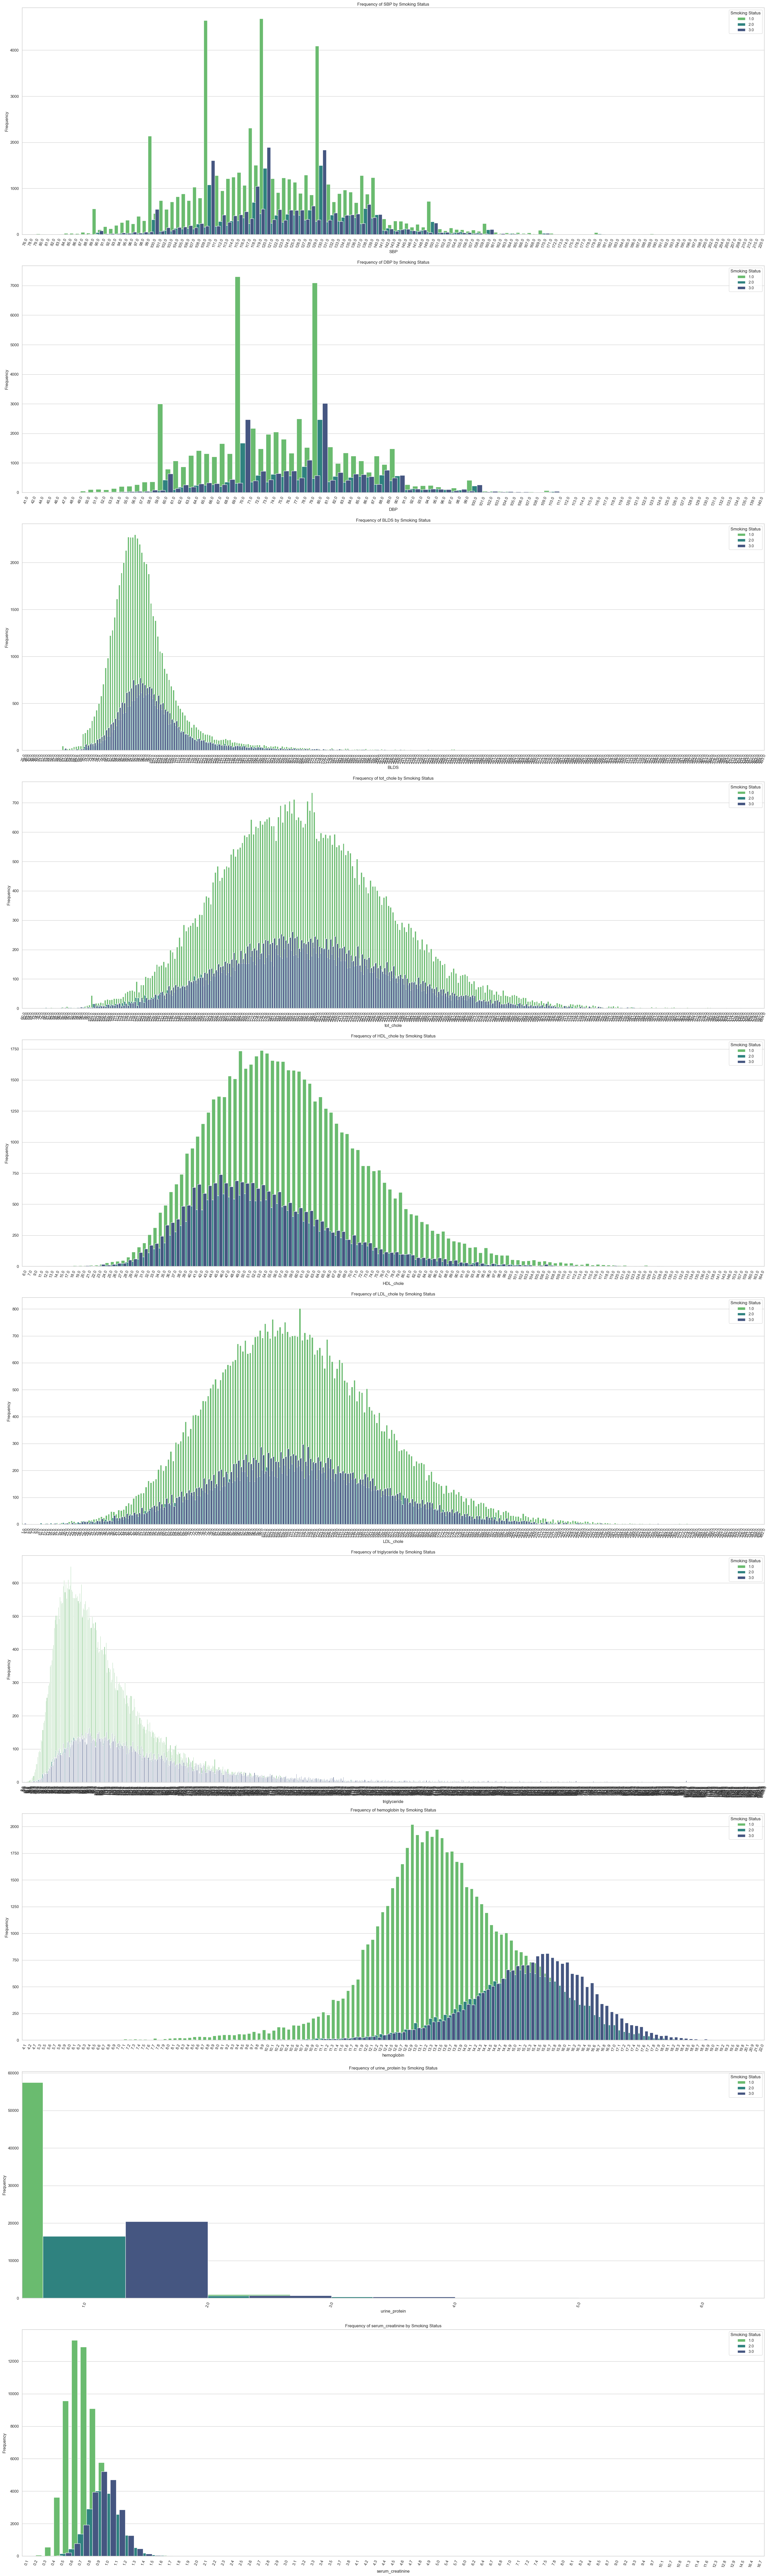

In [151]:
sns.set(style="whitegrid")
plt.figure(figsize=(30, 100))

random_sample_data = data.sample(n=100000, replace=True)

for idx, column in enumerate(['SBP', 'DBP', 'BLDS', 'tot_chole', 'HDL_chole', 'LDL_chole', 'triglyceride', 'hemoglobin', 'urine_protein', 'serum_creatinine'], start=1):
    plt.subplot(10, 1, idx)

    sns.countplot(x=column, hue="SMK_stat_type_cd", palette=f'viridis_r',
                  data=random_sample_data , width=2,)

    plt.xlabel(column)
    plt.xticks(rotation=70)
    plt.ylabel('Frequency')
    plt.title(f'Frequency of {column} by Smoking Status')
    plt.legend(title='Smoking Status', loc='upper right')

    print(idx)
plt.tight_layout()
plt.show()

### Heatmap

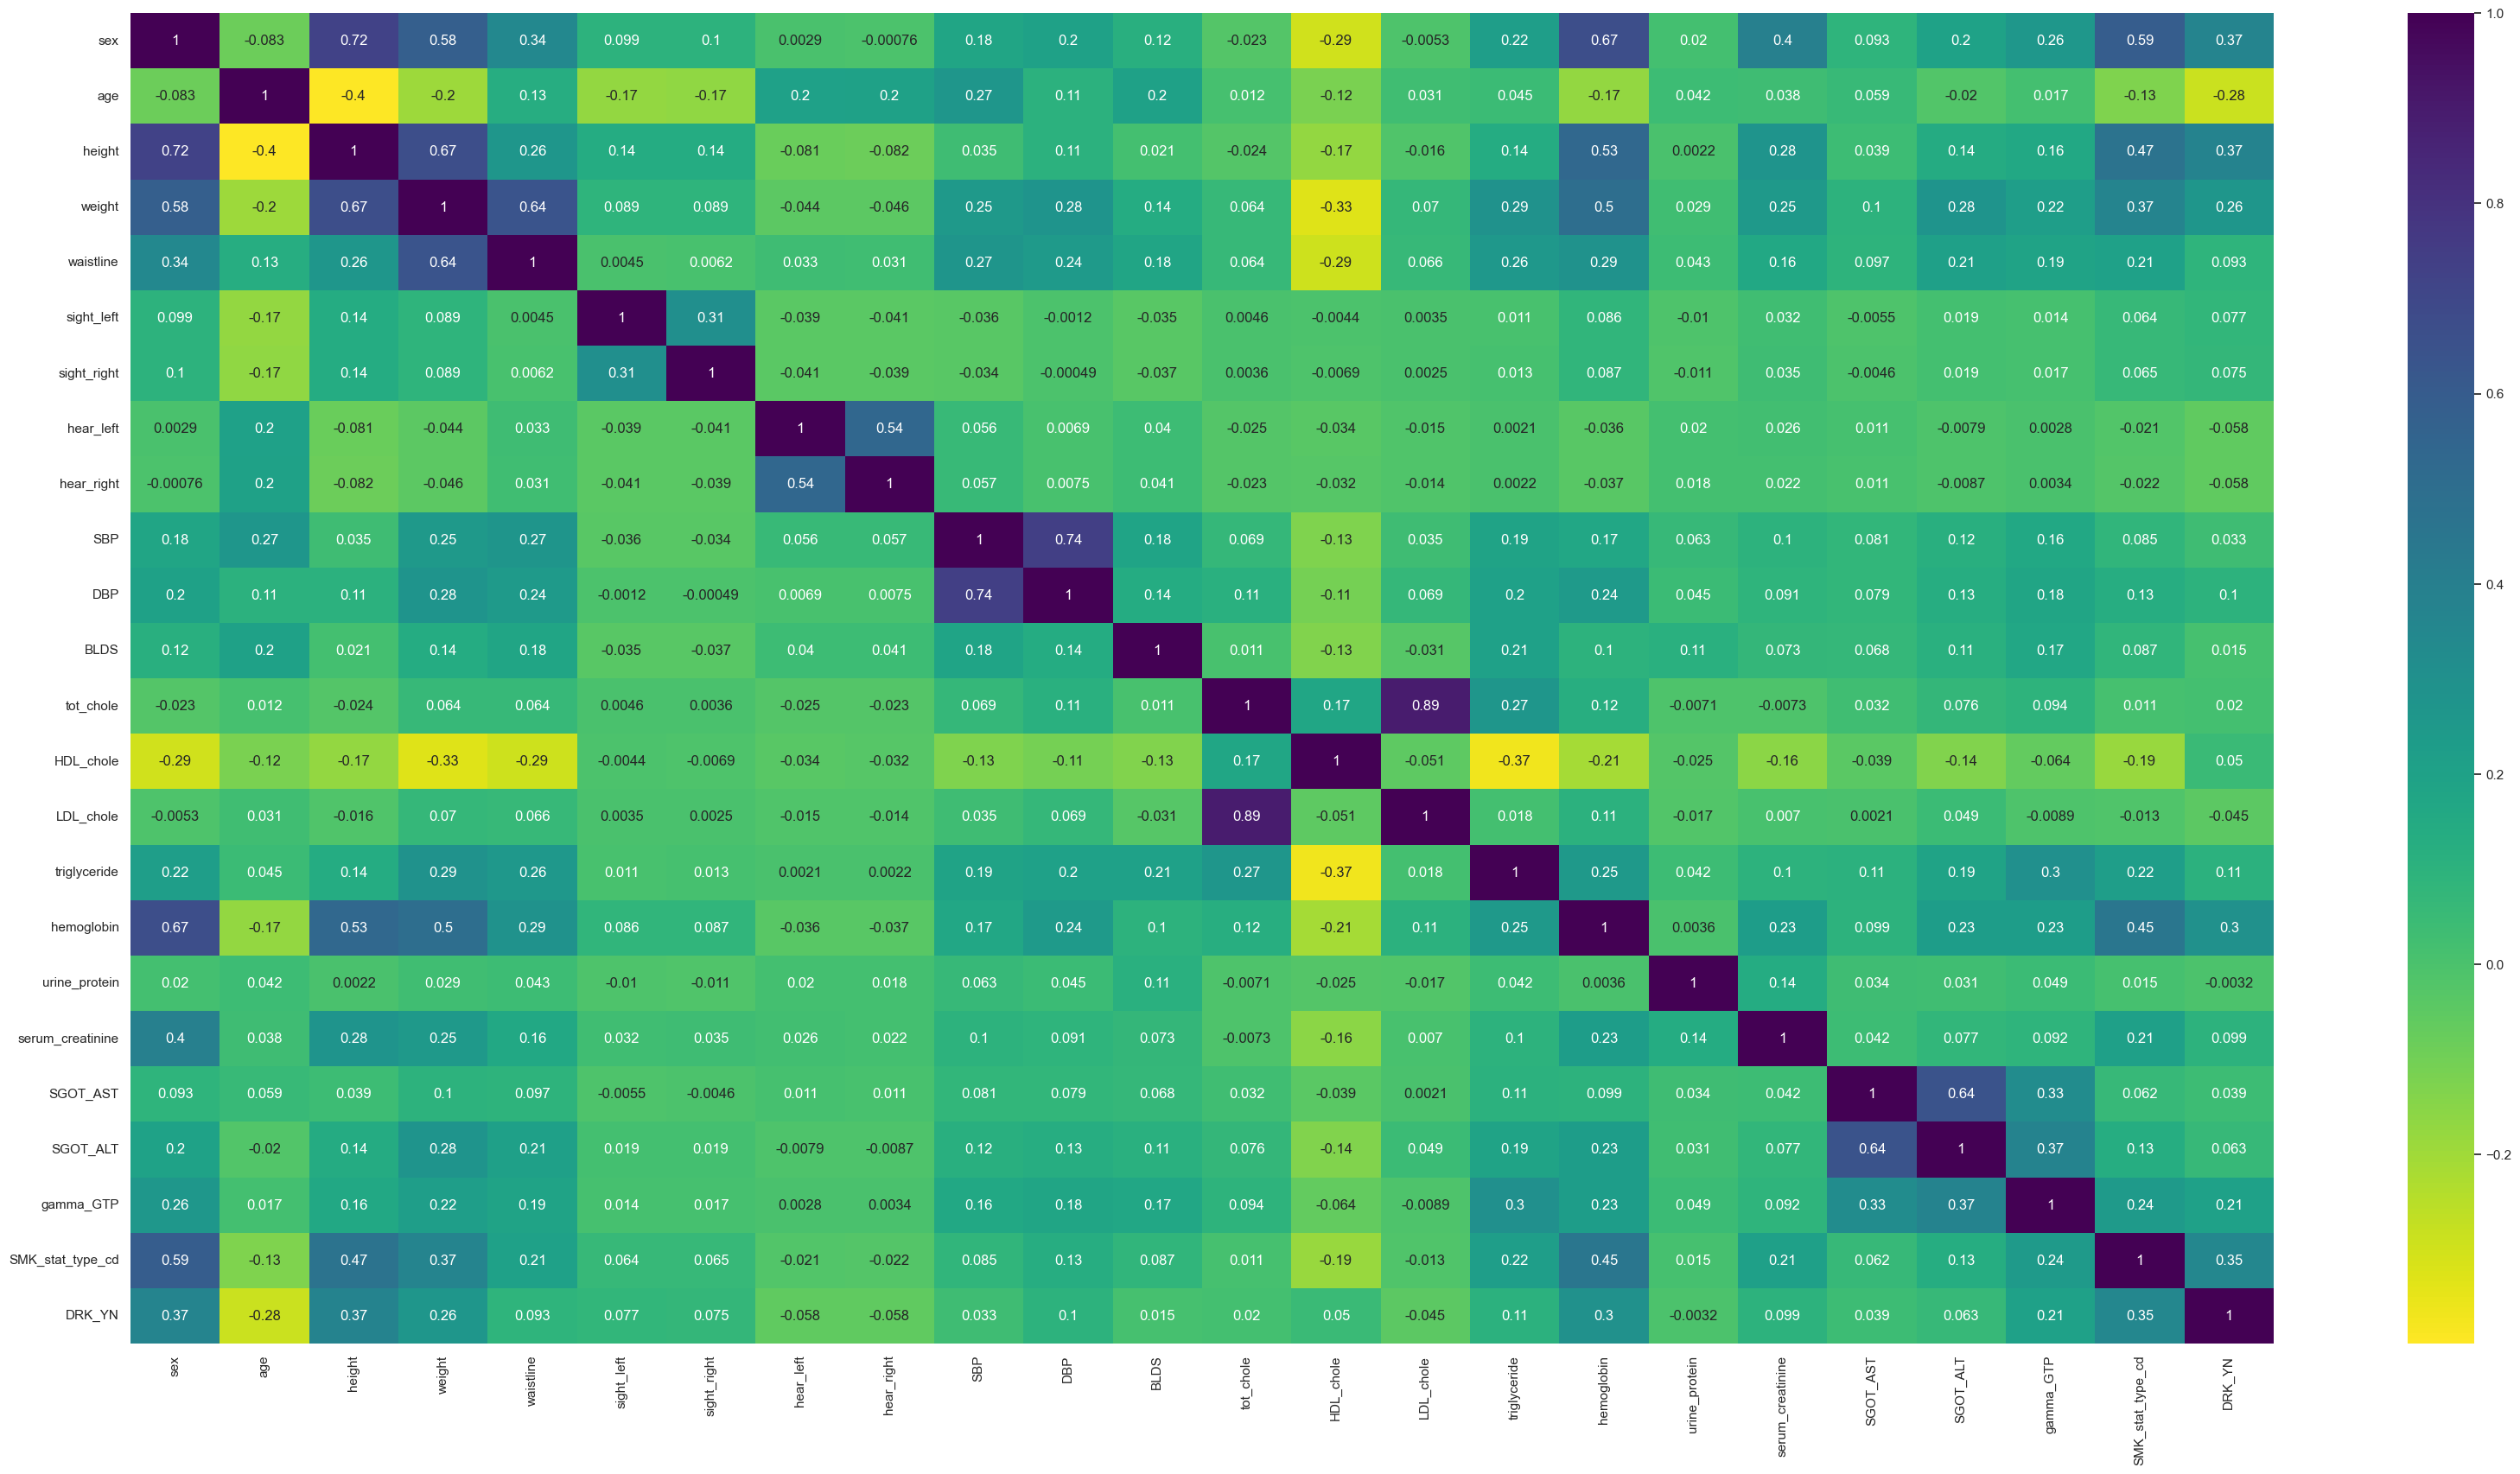

In [152]:
def heatmap():
    plt.figure(figsize=(40, 20))
    sns.heatmap(data.corr(), annot=True, cmap='viridis_r')
    plt.show()
heatmap()